# Coin toss

If a coin has a probability of $p$ for showing heads and $q=1-p$ for showing heads, then the probability of seeing $M$ heads when coin is tossed $n>M$ times is given by: 
$$ P(M;n) = \frac{n!}{M!(n-M)!} p^M q^{n-M} $$


If the fraction of heads seen in $n$ coin tosses is denoted $M_n\equiv M/n$, then clearly $0\le M_n \le 1$ and we expect that $\lim_{n\rightarrow \infty} M_{n} = p$. For $M_n$ being in the range $(x,y)$, we have: 
$$ Prob(x<M_n<y) = \sum_{r \in \mathcal Z~\wedge~x<\frac{r}{n}<y} P(r;n) $$



In [2]:
import scipy
import scipy.special
import math
import numpy as np
import random
import scipy.misc
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Task-1:  
1. Plot $\log P(M_n=x)$ vs $x$ for various $n$.  Note that $\int_{0}^{1} dx~P(M_n=x) = 1$.
2. Show that $P(M_n=x)$ near $x=\frac{1}{2}$ is Gaussian.

## Basic Binomial Distribution

In [3]:
n=50
x=10
p=0.5
q = 1-p

scipy.special.binom(n,x)*(math.pow(p, x))*math.pow(q,(n-x))

9.123615791750694e-06

## Plot of $M_{n}$ vs Probability

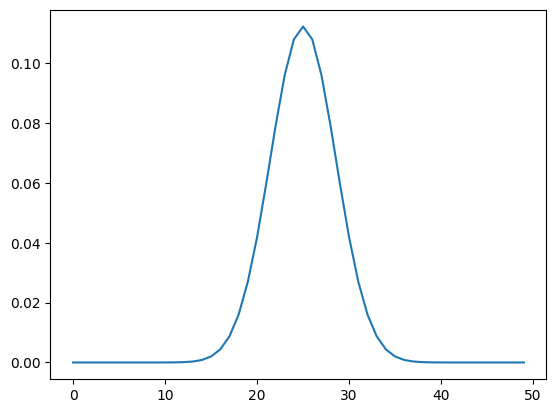

In [4]:
x = []
y= []
n = 50
p= float(0.5)
q = float(1-p)

for i in range(n):
    x.append(i)
    y.append(scipy.special.binom(n,i)*(math.pow(p, i))*math.pow(q,(n-i)))

    
plt.plot(x, y)

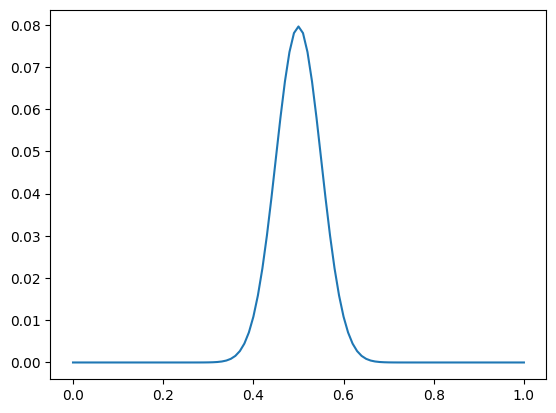

In [5]:
a=[]
b=[]
n = 100
p = 0.5
q = 1 - p

for M in range(n+1):
    a.append(M / n)
    b.append(scipy.special.binom(n,M)*(math.pow(p, M))*math.pow(q,(n-M)))

    
plt.plot(a, b)


## Solution to Task 1.1

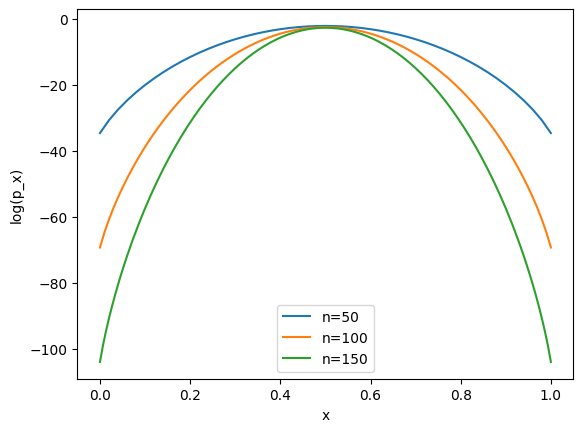

In [6]:
n_values = [50, 100, 150]  
p = 0.5
q = 1 - p

for n in n_values:
    x = []
    p_x_log = []

    for c in range(n + 1):
        x.append(c/n)
        p_x = scipy.special.binom(n, c) * math.pow(p, c) * math.pow(q, (n - c))
        p_x_log.append(math.log(p_x))

    plt.plot(x, p_x_log, label=f'n={n}')  

plt.xlabel('x')
plt.ylabel('log(p_x)')
plt.legend()
plt.show()



## Solution to Task 1.2

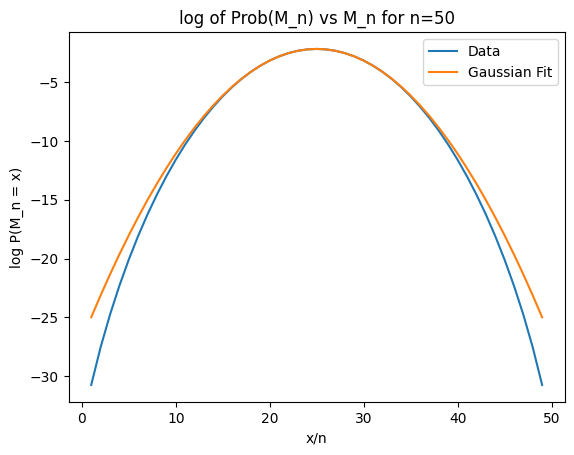

/home/chinmay/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


ValueError: math domain error

In [7]:
import numpy as np
import scipy.optimize
import scipy.special
import math
import matplotlib.pyplot as plt

p = q = 1/2

n_values = [50, 100, 150]

for n in n_values:
    y = []
    x = []
    for M in range(1, n):
        m = M/n
        x.append(M)
        pdf = scipy.special.binom(n, M) * math.pow(p, M) * math.pow(q, (n - M))
        y.append(pdf)

    def gaussian_fit(x, height, x0, sigma):
        return height * np.exp(-(x - x0)**2 / (8 * sigma**2))

    y = np.array(y)

    c1, _ = scipy.optimize.curve_fit(gaussian_fit, x, y, p0=[1, 0, 1])

    logy = []
    for j in y:
        logy.append(math.log(j))

    y_fit = gaussian_fit(x, *c1)

    logyfit = []
    for j in y_fit:
         logyfit.append(math.log(j))

    plt.plot(x, logy, label='Data')
    plt.plot(x, logyfit, label='Gaussian Fit')
    plt.xlabel('x/n')
    plt.ylabel('log P(M_n = x)')
    plt.title(f'log of Prob(M_n) vs M_n for n={n}')
    plt.legend()
    plt.show()


### Since the Gaussian curve closely fits the given data, we can say that near x = 1/2 this data is gaussian

## Task-2:  Assume a fair coin from now on i.e. $p=q=\frac{1}{2}$

Plot $\log P(M_n > x)$ as a function of $n\in[1,250]$ for $x=0.6,~0.7,~0.8,~0.9$

## Solution to Task 2

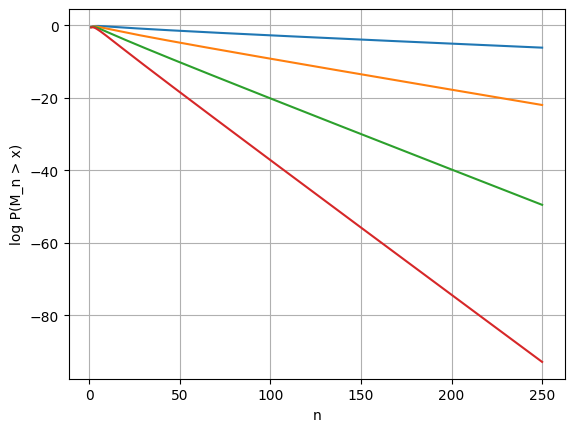

In [ ]:

p = 0.5
q = 1 - p
values = [0.6, 0.7, 0.8, 0.9]

for x in values:
    xx = []
    yy = np.arange(1, 251)
    for n in yy:
        cdf = 0
        for m in np.linspace(x, 1, n):
            M = m * n
            pdf = scipy.special.binom(n,M) * math.pow(p, M) * (math.pow(q,(n - M)))
            cdf += pdf
        xx.append(math.log(cdf))
    plt.plot(yy, xx)

plt.xlabel('n')
plt.ylabel('log P(M_n > x)')
plt.grid()
plt.show()



## Task-3: 
Note that for large $N$, the above plots are linear. 
Fit the above plots (of $\log Prob(M_n >x)$ vs $n$) to straight lines for large $n$ and get the slope, which we will call $I(x)$. Now plot $I(x)$ vs $x$.

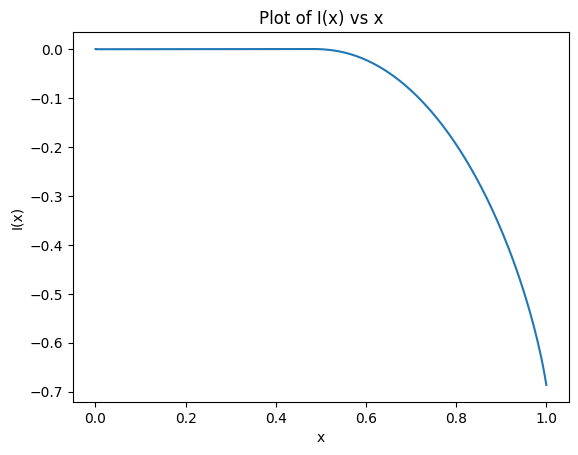

In [ ]:
n = 1000
p = q = 0.5
X = np.linspace(0, 1, 250)


xx = [0]
Ix = [0]

for x in X:
    cdf = 0
    Ix.append(x)
    for m in np.linspace(x, 1, n):
        M = m * n
        pdf = scipy.special.binom(n,M) * math.pow(p, M) * (math.pow(q,(n - M)))
        cdf += pdf
    slope = math.log(cdf) / n
    xx.append(slope)

plt.plot(Ix, xx)
plt.title("Plot of I(x) vs x")
plt.xlabel('x')
plt.ylabel('I(x)')

plt.show()

## Task-4:  Random walk
Let $c(t)$ be the result of coin toss, tossed at time $t$. Then Random Walk is given by 
$$ x(t+1) = x(t) + \delta_{c(t),H} - \delta_{c(t),T}
$$ 
with $x(0)=0$ and $c(t)$ is the coin toss at time $t$, with two possible outcomes heads ($H$) or tails ($T$).

Plot a one realisation of $x(t)$ for $t\in[0,100]$


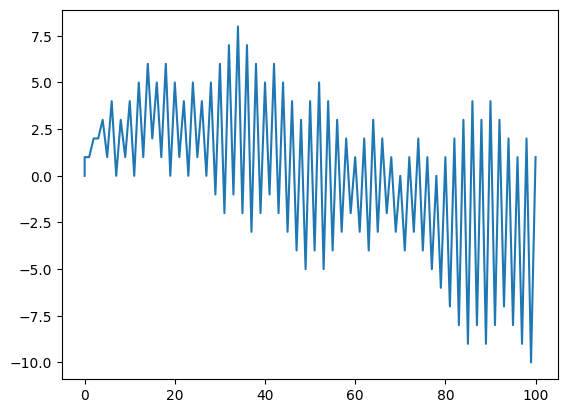

In [ ]:
x=[0]
check=[]
sum=[0]

for i in range(101):
    x.append(i)
    check.append(random.uniform(0,1))
    if(check[i] < 0.5):
        sum.append(sum[i-1]-1)
    else:
        sum.append(sum[i-1]+1)
        
plt.plot(x, sum);
plt.xlabel("Time(s)")
plt.ylabel("Value")
plt.title("Random Walk")

## Realisations of Multiple Random Walk Trajectories

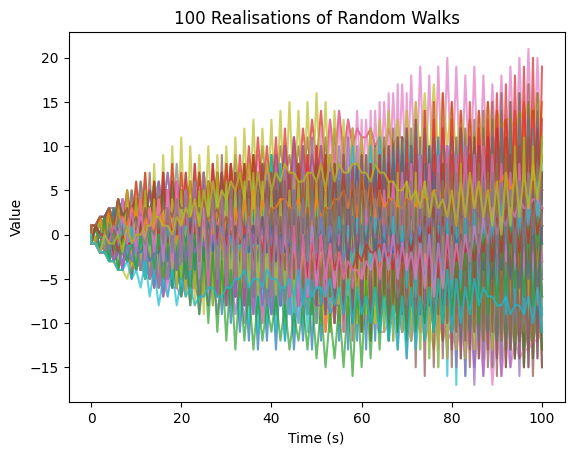

In [ ]:
trajectories = []

for _ in range(100):
    x = [0]
    check = []
    current_sum = [0]
    
    for i in range(101):
        x.append(i)
        check.append(random.uniform(0, 1))
        
        if check[i] < 0.5:
            current_sum.append(current_sum[i-1] - 1)
        else:
            current_sum.append(current_sum[i-1] + 1)
    
    trajectories.append(current_sum)

    
for trajectory in trajectories:
    plt.plot(x, trajectory, alpha=0.7)

plt.xlabel("Time (s)")
plt.ylabel("Value")
plt.title("100 Realisations of Random Walks")

plt.show()


## Task-5: Moments of distribution of $x(t)$

1. What would be $\langle x(t) \rangle$? 
2. What would be $\langle x^2(t) \rangle$? Why?
3. Compute them by genrating a sample of random walks. Comment on the 'error' of the calculation

## Solution to Task 5.1
### Expected Values of Mean of Displacement

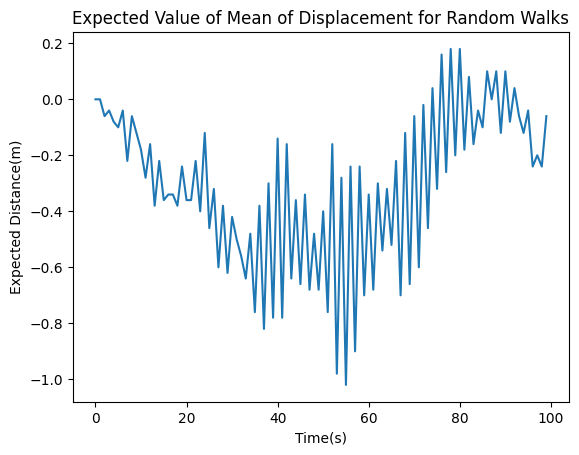

In [ ]:
trajectories = []

for x in range(100):
    x=[0]
    check=[]
    current_sum=[0]
    
    for i in range(101):
        x.append(i)
        check.append(random.uniform(0,1))
        
        if check[i] < 0.5:
            current_sum.append(current_sum[i-1] - 1)
        else:
            current_sum.append(current_sum[i-1] + 1)
    
    trajectories.append(current_sum)

time=[]
mean=[]
for t in range(100):
    sum=0
    time.append(t)
    for x in trajectories:
        sum+=x[t]
    sum=sum/100
    mean.append(sum)
        
plt.plot(time, mean)
plt.title("Expected Value of Mean of Displacement for Random Walks")
plt.xlabel("Time(s)")
plt.ylabel("Expected Distance(m)")
plt.show()

Since the probability of getting a a heads or a tails is the same at each iteration, and the magnitude of the step for both of these is equal and opposite, over a long time the expected value of the mean of the displacement should tend to zero. By generating many realisations of random walks, we see that this is empirically verified.

## Solution to Task 5.2
### Expected Values of Mean of Square of Displacement

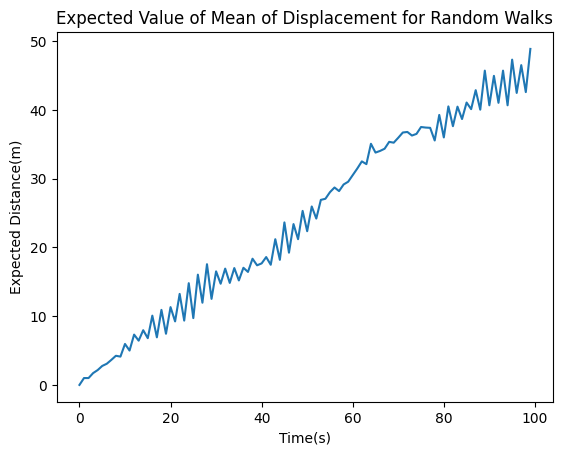

In [ ]:
trajectories = []

for x in range(100):
    x=[0]
    check=[]
    current_sum=[0]
    
    for i in range(101):
        x.append(i)
        check.append(random.uniform(0,1))
        
        if check[i] < 0.5:
            current_sum.append(current_sum[i-1] - 1)
        else:
            current_sum.append(current_sum[i-1] + 1)
    
    trajectories.append(current_sum)

time=[]
mean=[]
for t in range(100):
    sum=0
    time.append(t)
    for x in trajectories:
        sum+=x[t]**2
    sum=sum/100
    mean.append(sum)
        
plt.plot(time, mean)
plt.title("Expected Value of Mean of Displacement for Random Walks")
plt.xlabel("Time(s)")
plt.ylabel("Expected Distance(m)")
plt.show()

We see that this plot is roughly a straight line in the limit with the slope tending to 1 if we choose larger values of the number of random walk realisations averaged over and the time steps in each such random walk. This is as expected because $<x^2(t)>$ roughly tells us the expected distance from the origin after t time steps. We can statistically show that the distance should be of the order $\sqrt t$. For larger values the error will be reduced and the graph will be "smoothed out" into the limiting value of a straight line.

## Task-6: Random walk with a trap

At $x=M$, random walker is trapped, i.e. imagine that $x=M$ is the location of jail, where once the 'drunk' random walker reaches, is trapped for ever. 

Let $y_M(t)$ is the probabilty that a trapped random walker at time $t$ in a trap located at $x=M$, given that  starting  point is $x=0$ at $t=0$. 

Compute $y_M(t)$ by generating a sample of random walks. Comment.

## Realisation of One Random Walk with a Trap

Text(0.5, 1.0, 'Random Walk')

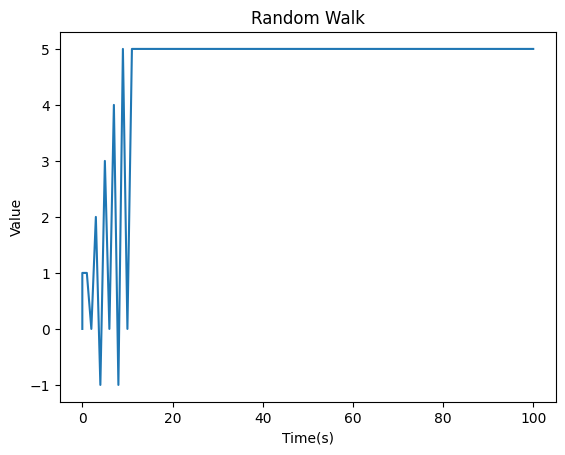

In [ ]:
x=[0]
check=[]
sum=[0]
flag=0
M= 5

for i in range(101):
    x.append(i)
    if flag == 0:
        check.append(random.uniform(0,1))
        if(check[i] < 0.5):
            sum.append(sum[i-1]-1)
        else:
            sum.append(sum[i-1]+1)
        if (sum[i] == M):
            flag = 1
    elif flag != 0:
        sum.append(M)
        
    
plt.plot(x, sum);
plt.xlabel("Time(s)")
plt.ylabel("Value")
plt.title("Random Walk")

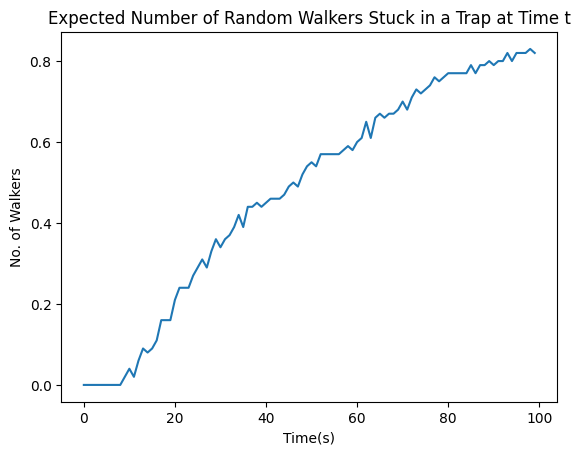

In [ ]:
trajectories = []

for x in range(100):
    x=[0]
    check=[]
    sum=[0]
    M=5
    flag = 0
    
    for i in range(101):
        x.append(i)
        if flag == 0:
            check.append(random.uniform(0,1))
            if(check[i] < 0.5):
                sum.append(sum[i-1]-1)
            else:
                sum.append(sum[i-1]+1)
            if (sum[i] == M):
                flag = 1
        elif flag != 0:
            sum.append(M)
    
    trajectories.append(sum)

time=[]
stuck=[]

for t in range(100):
    count=0
    time.append(t)
    for x in trajectories:
        if x[t]== M:
            count+=1
        
    stuck.append(count/100)
        
plt.plot(time, stuck)
plt.title("Expected Number of Random Walkers Stuck in a Trap at Time t")
plt.xlabel("Time(s)")
plt.ylabel("No. of Walkers")
plt.show()


## Task-7: What is the relationship between the result in Task-2 for `Coin Toss problem` and the rate of reaching the trap in Task-6 for `Random walk with a trap` problem

Both the coin toss problem and the random walk with a trap problem can be characterized as random processes involving independent events and uncertain outcomes. Due to the inherent randomness in these processes, exact predictions of the results are not possible. However, by leveraging the principles of probability theory and statistics, we can quantitatively determine the probabilities associated with specific events and establish confidence intervals for certain cases.

Fundamentally, both tasks exhibit a binary nature, where each event can have only two possible outcomes. In the coin toss problem, the outcomes are heads ($H$) or tails ($T$), while in the random walk problem, the walker can move either to the left ($L$) or to the right ($R$). It is important to note that in the random walk problem, once the walker reaches the trap location, subsequent events cease to occur, effectively terminating the experiment.

When applying Cramer's theorem to analyze the probabilities in these problems, the mathematical expressions employed differ. In the coin toss problem, we utilize the binomial coefficient ($C(n, k)$) along with the probabilities of obtaining heads ($p_H$) and tails ($p_T$) to calculate the probability of achieving a specific number of heads ($k$) in a fixed number of tosses ($n$). The resulting probability distribution for the coin toss problem is expected to exhibit uniformity.

Conversely, in the random walk with a trap problem, our objective is to quantitatively determine the probability ($P(\text{trap at } M \text{ at time } t)$) of the walker being trapped at a specific location ($M$) at a given time ($t$). This requires considering the probabilities associated with various paths leading to the trap location, accounting for the number of steps taken and the elapsed time. The presence of additional constraints, such as the trap location and the limited movements of the walker, introduces variations in the outcomes. Consequently, the resulting probability distribution for the random walk problem exhibits a jagged or irregular shape.

Furthermore, it is worth noting that the random walk problem may involve cases where certain events have a probability of zero ($P = 0$) due to the specific constraints imposed. For instance, if the trap location is unreachable within the given time frame, the probability of the walker being trapped there at that particular time will be zero.

To summarize, Cramer's theorem provides a comprehensive framework rooted in probability theory and statistics for quantitatively analyzing the probabilities associated with both the coin toss problem and the random walk with a trap problem. Although both problems involve independent events and random outcomes, they differ in terms of the specific mathematical expressions employed to calculate probabilities and the resulting probability distributions. By grasping the underlying principles of Cramer's theorem, we can gain valuable quantitative insights into the probabilities governing these intriguing scenarios.